## 1- Import the required libraries

In [3]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns


## 1- Load data
Both datasets are cleaned

In [5]:
#Import clean order data
df_order = pd.read_csv('/Users/alijanehsan/Downloads/Final_project/cleaned_order.csv',index_col=0)
df_order.shape

(2128524, 10)

In [6]:
# Import the item data
df_item = pd.read_csv('/Users/alijanehsan/Downloads/Final_project/cleaned_item.csv',index_col=0)
df_item.shape

(309128, 11)

## 3- Merge datasets

In [7]:
df_merge = pd.merge(df_order, df_item, on = 'item_code')

In [12]:
df_merge.head(5)

,date,item_code,quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,site,sales,country,item_name,style,name,group0,group1,category,gender,age,color,size
0,2022-01-14,ZB00245086,1,107.443868,63.815891,126.367186,E-COMMER,top4running.at,107.443868,Austria,Cloudsurfer,54-99218,On Running,Footwear,Running shoes,running,men,adults,White,44
1,2021-12-09,ZB00245086,1,98.582325,63.816279,129.458420,E-COMMER,top4running.it,98.582325,Italy,Cloudsurfer,54-99218,On Running,Footwear,Running shoes,running,men,adults,White,44
2,2021-12-08,ZB00245086,1,100.182074,63.815891,131.559296,E-COMMER,top4running.at,100.182074,Austria,Cloudsurfer,54-99218,On Running,Footwear,Running shoes,running,men,adults,White,44
3,2021-12-04,ZB00245086,1,98.350139,63.816279,129.153514,E-COMMER,top4running.it,98.350139,Italy,Cloudsurfer,54-99218,On Running,Footwear,Running shoes,running,men,adults,White,44
4,2021-11-14,ZB00245086,1,99.296899,63.815891,130.396884,E-COMMER,top4running.at,99.296899,Austria,Cloudsurfer,54-99218,On Running,Footwear,Running shoes,running,men,adults,White,44


In [13]:
df_merge.shape

(2128524, 20)

In [14]:
df_merge.isnull().sum()

date                   0
item_code              0
quantity               0
unit_price_vat_excl    0
unit_cogs              0
unit_rrp_vat_excl      0
department             0
site                   0
sales                  0
country                0
item_name              0
style                  0
name                   0
group0                 0
group1                 0
category               0
gender                 0
age                    0
color                  0
size                   0
dtype: int64

<AxesSubplot:>

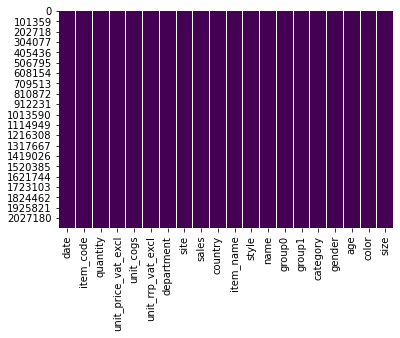

In [8]:
# Visualizing the missing values
sns.heatmap(df_merge.isnull(),cbar=False,cmap='viridis')

We can see that there is no missing values in the data

## 4-Asking Analytical Questions and Visualizations

## 1- Check correlations in the dataset

<AxesSubplot:>

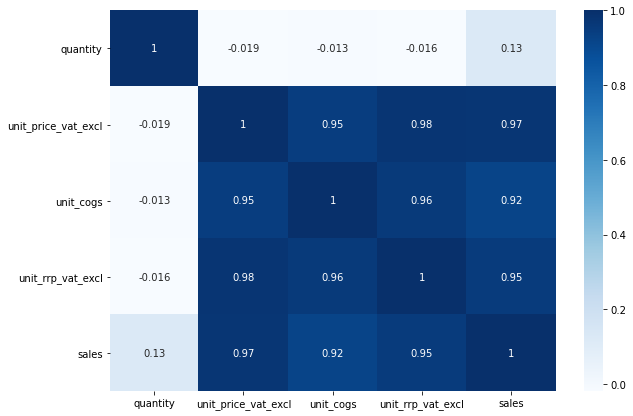

In [16]:
# Check the data correlation
plt.figure(figsize=(10,7))
sns.heatmap(df_merge.corr(),cbar=True,annot=True,cmap='Blues')


We can see that there are some positive and some negative correlation

## 2-  Check the outliers

In [9]:
Q1 = df_merge.quantile(0.25)
Q3 =df_merge.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


quantity                0.000000
unit_price_vat_excl    42.262381
unit_cogs              28.712597
unit_rrp_vat_excl      55.489641
sales                  43.309553
dtype: float64


Remove outliers

In [18]:
# Remove the outlier
df_merge2 = df_merge[~((df_merge < (Q1 - 1.5 * IQR)) |(df_merge > (Q3 + 1.5 * IQR))).any(axis=1)]


<ipython-input-18-a914badfefaa>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_merge2 = df_merge[~((df_merge < (Q1 - 1.5 * IQR)) |(df_merge > (Q3 + 1.5 * IQR))).any(axis=1)]


In [19]:
# Check the outlier again
df_merge2.shape


(1911344, 20)

## 3-  Wich country had the highest demand for Top4Sport equipments

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country', ylabel='count'>

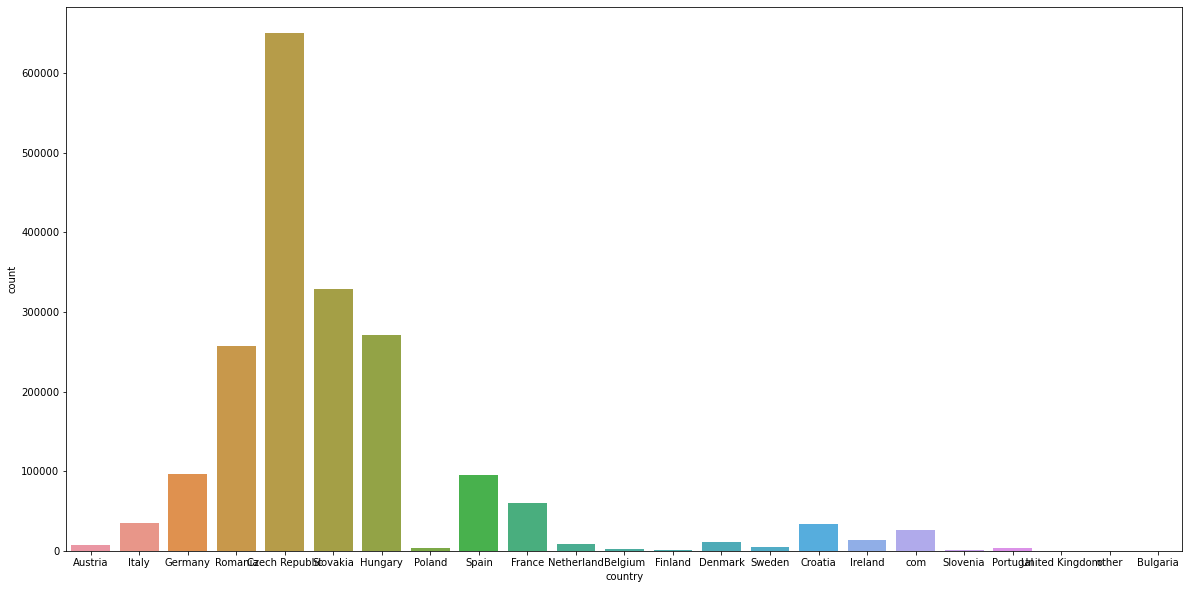

In [21]:

from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
sns.countplot(df_merge2['country'])

Czech Republic has had the highest demand for Top4Sport equipments

In [22]:
df_merge2['country'].value_counts()

Czech Republic    650064
Slovakia          328889
Hungary           270961
Romania           256946
Germany            96276
Spain              95304
France             59791
Italy              34672
Croatia            33770
com                25582
Ireland            13666
Denmark            10788
Netherland          8688
Austria             7799
Sweden              5369
Portugal            4132
Poland              3976
Belgium             2742
Finland             1225
Slovenia             618
other                 71
United Kingdom        10
Bulgaria               5
Name: country, dtype: int64

## 5- Which color is the most pouplar one demanded by customers?
 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

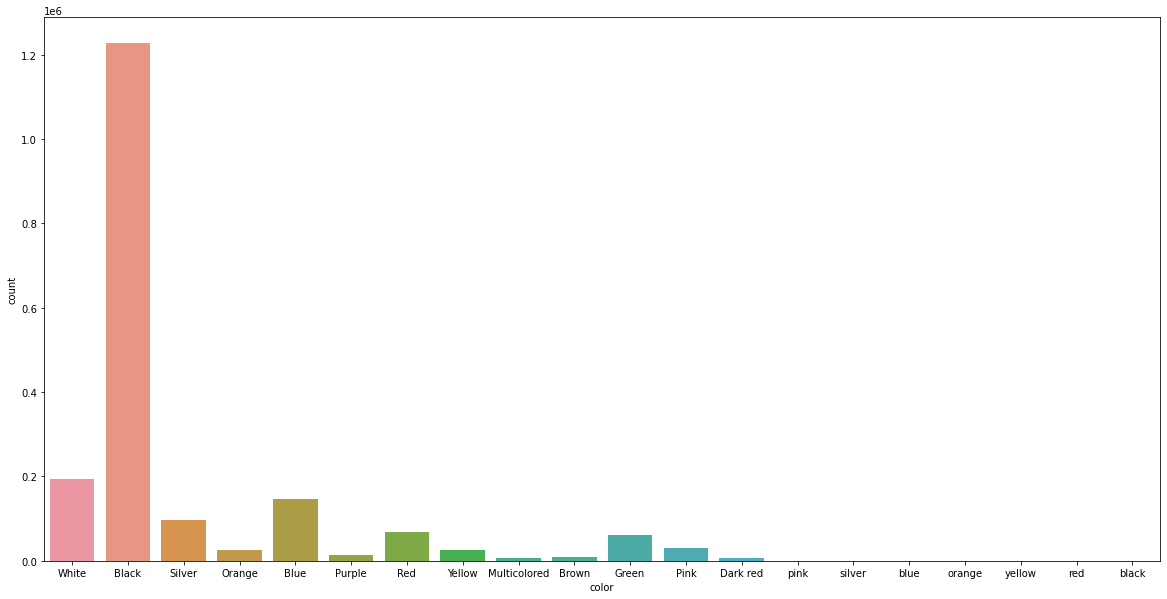

In [23]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
sns.countplot(df_merge2['color'])

Black color is the most popular color 

In [24]:
df_merge2['color'].value_counts()

Black           1227232
White            193156
Blue             147399
Silver            96692
Red               68524
Green             60339
Pink              29931
Yellow            25764
Orange            24428
Purple            13943
Brown              8992
Multicolored       7432
Dark red           7367
orange               46
blue                 34
pink                 21
silver               18
black                16
yellow                7
red                   3
Name: color, dtype: int64

## 6- Check the demand for gender (male and female)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

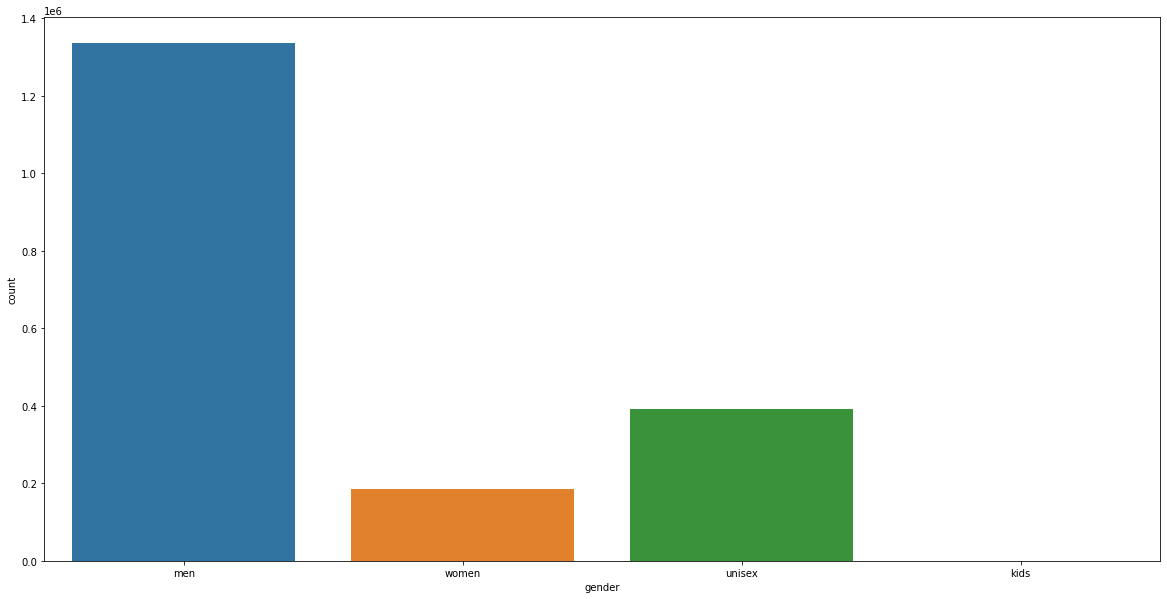

In [25]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
sns.countplot(df_merge2['gender'])

Men has had the highest demand

## 6- Which  age group bought more equipments

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

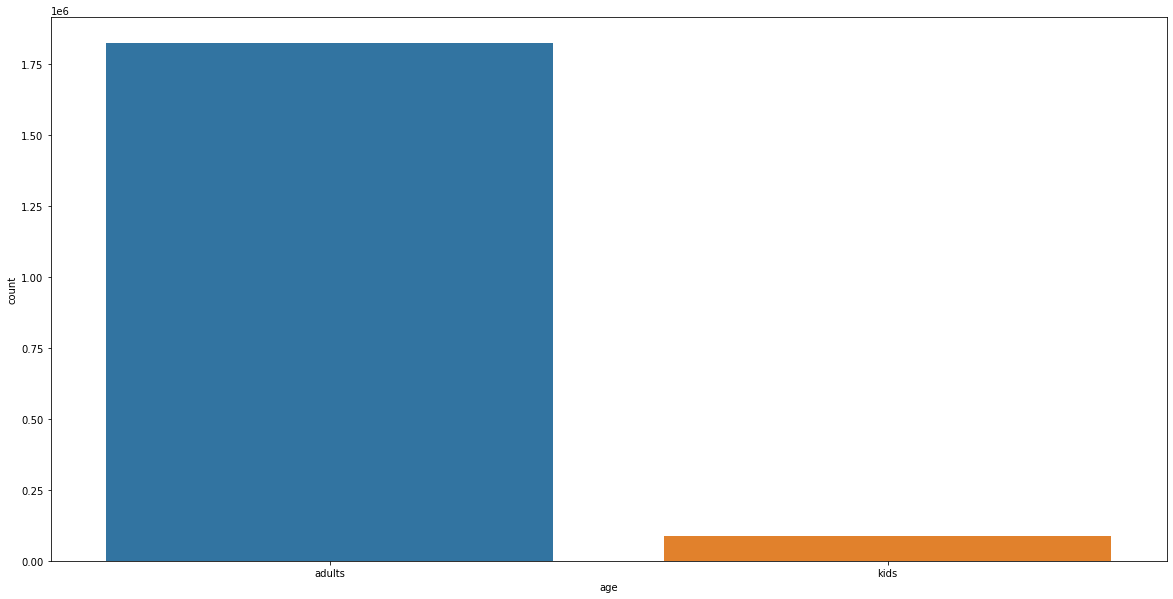

In [26]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
sns.countplot(df_merge2['age'])

## 7 -  Which category is the most popular?

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

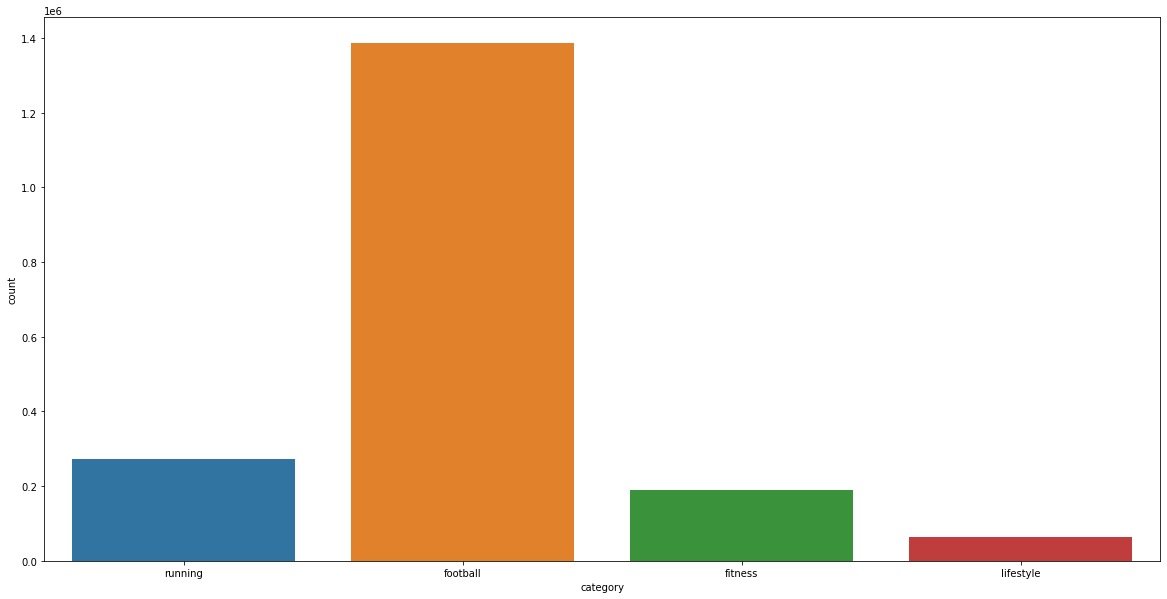

In [27]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
sns.countplot(df_merge2['category'])

Footbal's equipments and wearings had the highest demand

## 8- What is the relationship between cost of unit sold(unit_cogs) and sales

In [28]:
# First rename the sales' columns as revenue
df_merge2.rename(columns={"sales":"Revenue"},inplace=True)


<ipython-input-28-5876430992fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge2.rename(columns={"sales":"Revenue"},inplace=True)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='unit_cogs', ylabel='Revenue'>

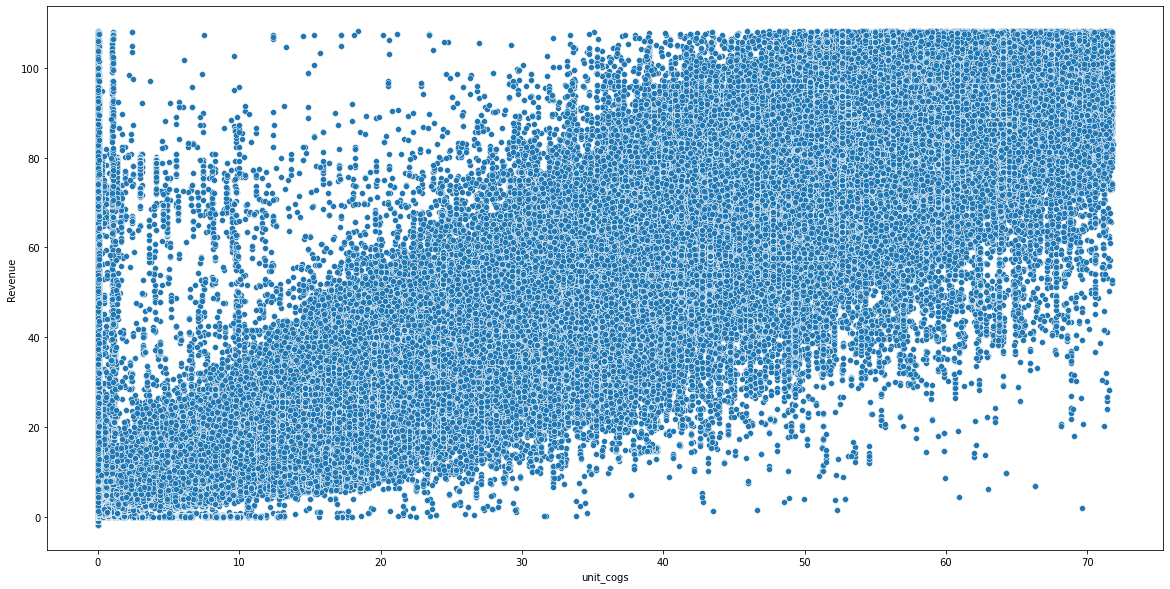

In [30]:
sns.scatterplot(df_merge2['unit_cogs'], df_merge2['Revenue'])

## 9 - Is there any relationship between gender and demand?

<AxesSubplot:xlabel='gender', ylabel='Revenue'>

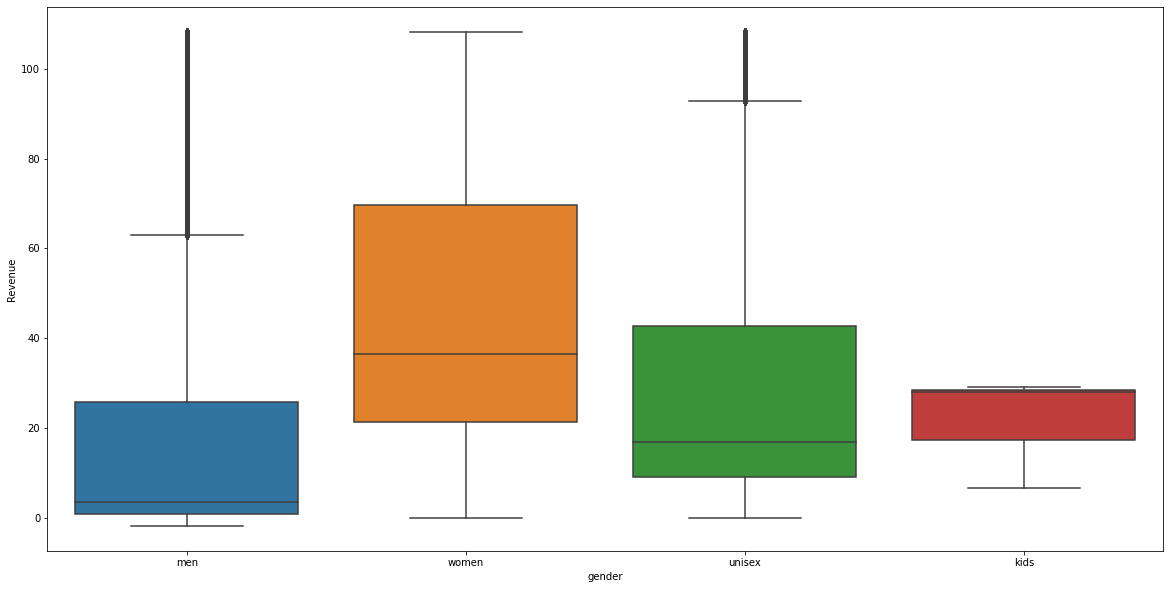

In [31]:
sns.boxplot(x=df_merge2['gender'], y=df_merge2['Revenue'])

 Women had the highest rate of purchasing

## 10- Is there any trend in historical revenue generation?

In [ ]:
"""df_merge2['date'] = pd.to_datetime(df_merge2.date)
df_merge2.set_index('date')"""

 Since there multiple dates per customer, so we need to summarize the data by date  and then plot it. 

<ipython-input-33-d5cdce18d95b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge2['date'] = pd.to_datetime(df_merge2.date)


<AxesSubplot:xlabel='date', ylabel='Revenue'>

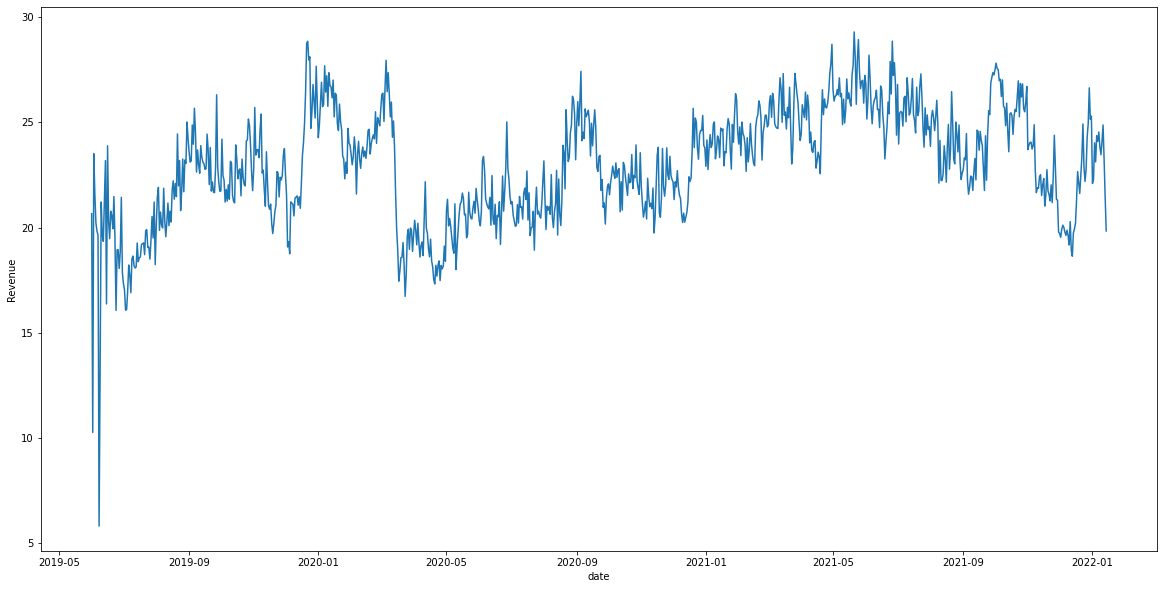

In [33]:
df_merge2['date'] = pd.to_datetime(df_merge2.date)
df_index = df_merge2.set_index('date')
sns.lineplot(x= df_index.groupby(df_index.index).mean().index, 
             y = df_index.groupby(df_index.index).mean()['Revenue'])

## 10- What is the spending patterns of females and males and in which category do they spend a lot?

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Total Monthly transaction by Gender'}, xlabel='category', ylabel='count'>

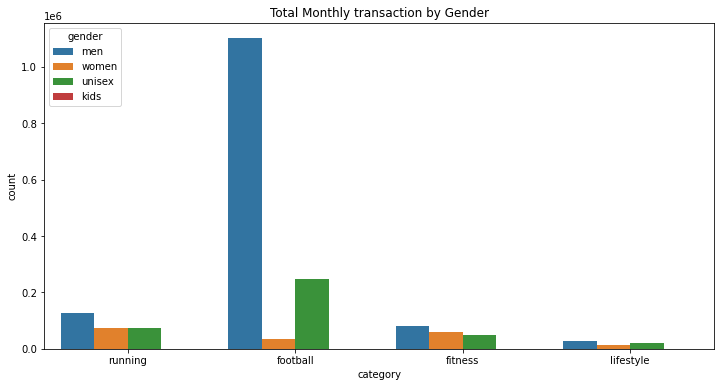

In [35]:
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(df_merge2['category'], hue = df_merge2.gender)



## 11- What is female spending pattern

In [36]:
# Create a dummy variable for gender
gender_dummies  = pd.get_dummies(df_merge2['gender'])
gender_dummies.head()

,kids,men,unisex,women
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
# Join the dummy data with the main dataset
df = pd.concat([df_merge2, gender_dummies], axis = 1)
df.head()

<AxesSubplot:xlabel='category', ylabel='women'>

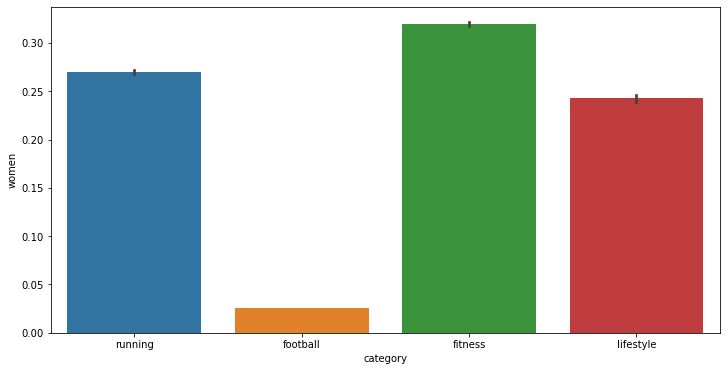

In [38]:
# 
plt.figure(figsize = (12,6))
sns.barplot(x = 'category', y = 'women', data = df)

## 13 - What is   spending pattern for male

<AxesSubplot:xlabel='category', ylabel='men'>

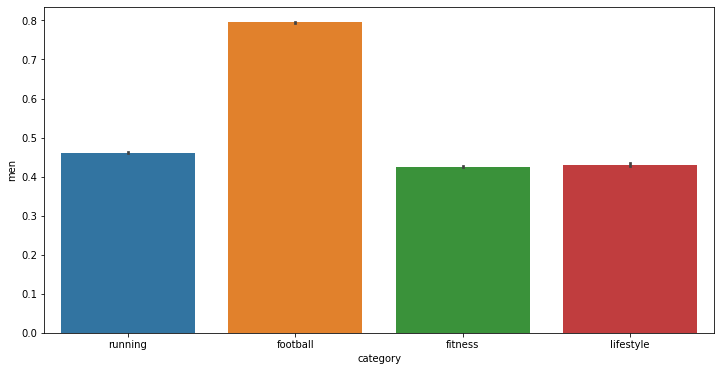

In [39]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'category', y = 'men', data = df)

## 14- Which day of the week has  the max and min sale

In [ ]:

#Convert datetime column/series to day of the week
df['day'] = df['date'].dt.day_name()
df.head()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Daily Sales by Day of the Week'}, xlabel='day', ylabel='count'>

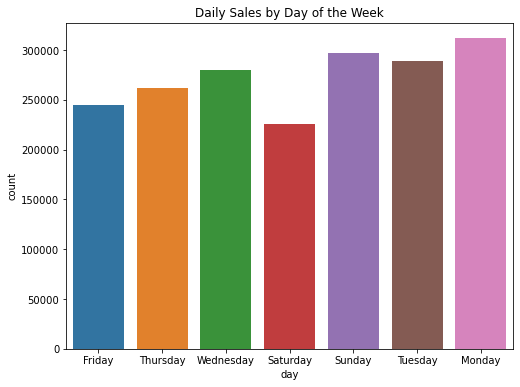

In [42]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
sns.countplot(df['day'])

Respectively Monday and Saturday have the max and min sales

## 15 - Which month of the year has the max and min sales

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Monthly Sales'}, xlabel='month', ylabel='count'>

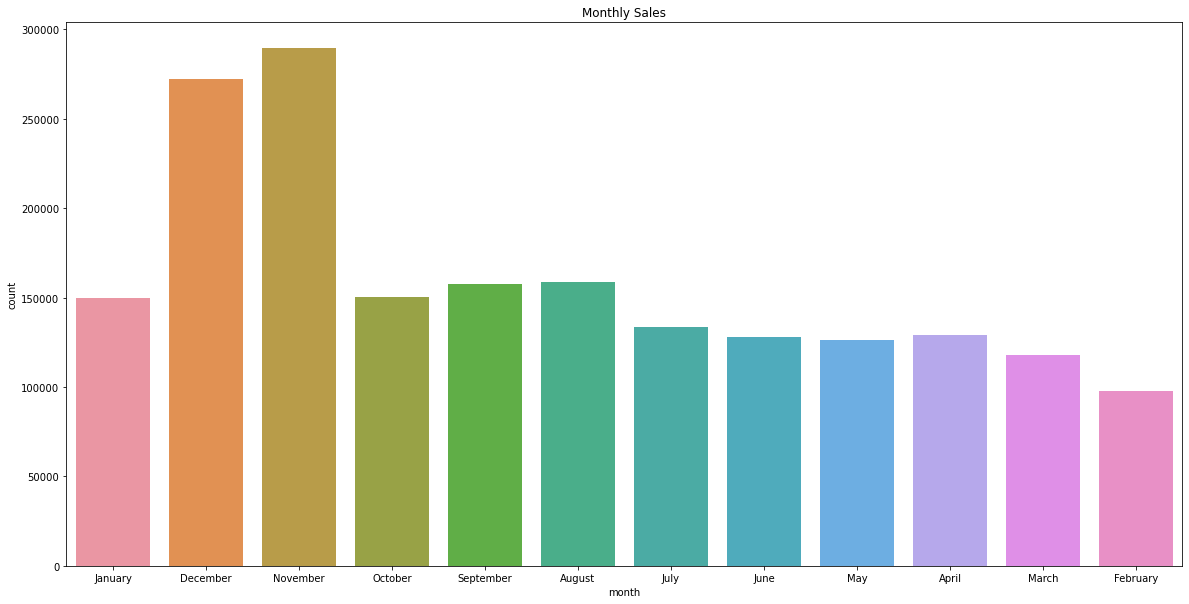

In [43]:
df['month'] = df['date'].dt.month_name()
plt.title('Monthly Sales')
sns.countplot(df['month'])

In [44]:
df.to_csv(r'/Users/alijanehsan/Downloads/Final_project/merge.csv')

Respectively December and February have the highest and lowest sales

## 16- Which month has the highest and the lowest sales? 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Yearly Sales'}, xlabel='year', ylabel='count'>

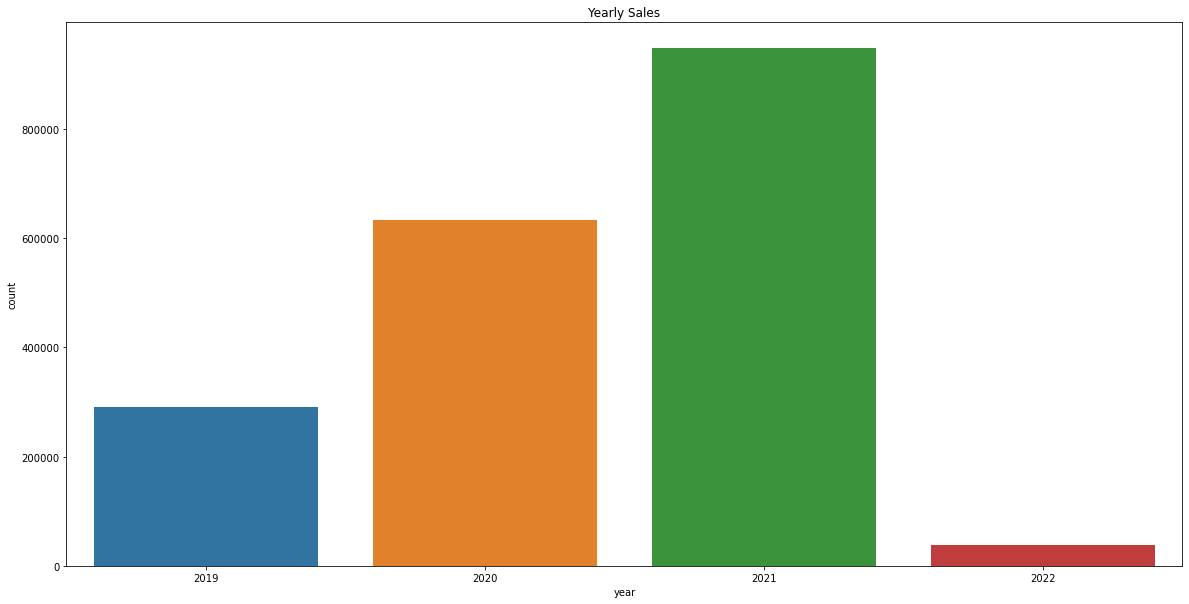

In [45]:
df['year'] = df['date'].dt.year
plt.title('Yearly Sales')
sns.countplot(df['year'])
